# EV Charging Station Customer Segmentation



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv(r"C:\Users\satvi\Downloads\ev_charging_patterns.csv")

print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

Data Preprocessing


In [3]:

data['Charging Start Time'] = pd.to_datetime(data['Charging Start Time'])
data['Charging End Time'] = pd.to_datetime(data['Charging End Time'])

data['Energy Consumed (kWh)'] = data['Energy Consumed (kWh)'].fillna(
    data['Charging Rate (kW)'] * data['Charging Duration (hours)']
)

data.dropna(subset=['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)'], inplace=True)

data['Charging Start Hour'] = data['Charging Start Time'].dt.hour

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = [
    'Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Duration (hours)',
    'Charging Rate (kW)', 'Charging Cost (USD)', 'State of Charge (Start %)',
    'State of Charge (End %)', 'Distance Driven (since last charge) (km)', 'Temperature (°C)'
]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 0 to 1319
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   User ID                                   1189 non-null   object        
 1   Vehicle Model                             1189 non-null   object        
 2   Battery Capacity (kWh)                    1189 non-null   float64       
 3   Charging Station ID                       1189 non-null   object        
 4   Charging Station Location                 1189 non-null   object        
 5   Charging Start Time                       1189 non-null   datetime64[ns]
 6   Charging End Time                         1189 non-null   datetime64[ns]
 7   Energy Consumed (kWh)                     1189 non-null   float64       
 8   Charging Duration (hours)                 1189 non-null   float64       
 9   Charging Rate (kW)                 

(  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
 0  User_1        BMW i3                0.558460         Station_391   
 1  User_2  Hyundai Kona                0.514259         Station_428   
 2  User_3    Chevy Bolt                0.383688         Station_181   
 3  User_4  Hyundai Kona                0.253117         Station_327   
 4  User_5  Hyundai Kona                0.253117         Station_108   
 
   Charging Station Location Charging Start Time   Charging End Time  \
 0                   Houston 2024-01-01 00:00:00 2024-01-01 00:39:00   
 1             San Francisco 2024-01-01 01:00:00 2024-01-01 03:01:00   
 2             San Francisco 2024-01-01 02:00:00 2024-01-01 04:48:00   
 3                   Houston 2024-01-01 03:00:00 2024-01-01 06:42:00   
 4               Los Angeles 2024-01-01 04:00:00 2024-01-01 05:46:00   
 
    Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  ...  \
 0               0.369504                   0.06579

Data Visualization

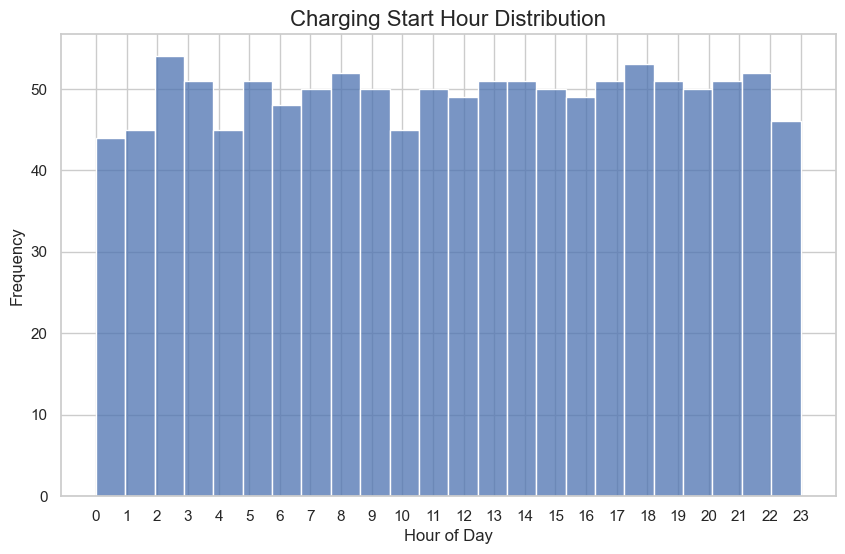

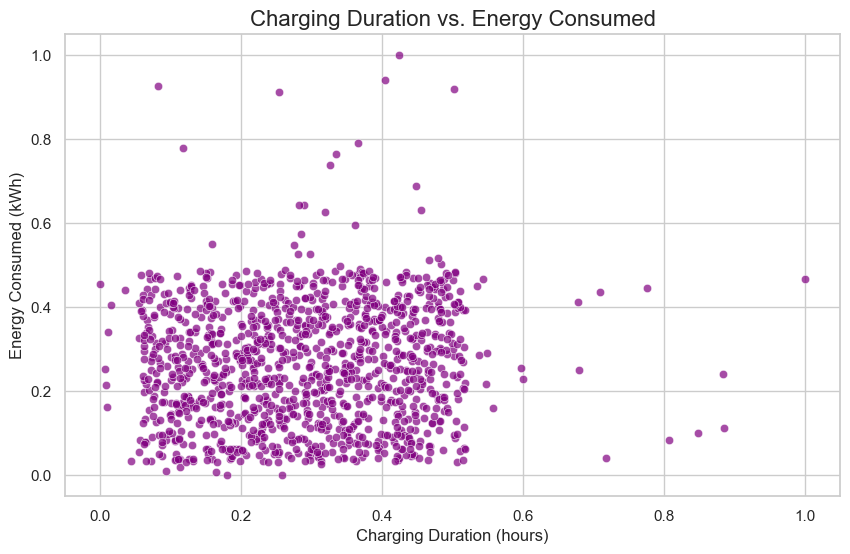

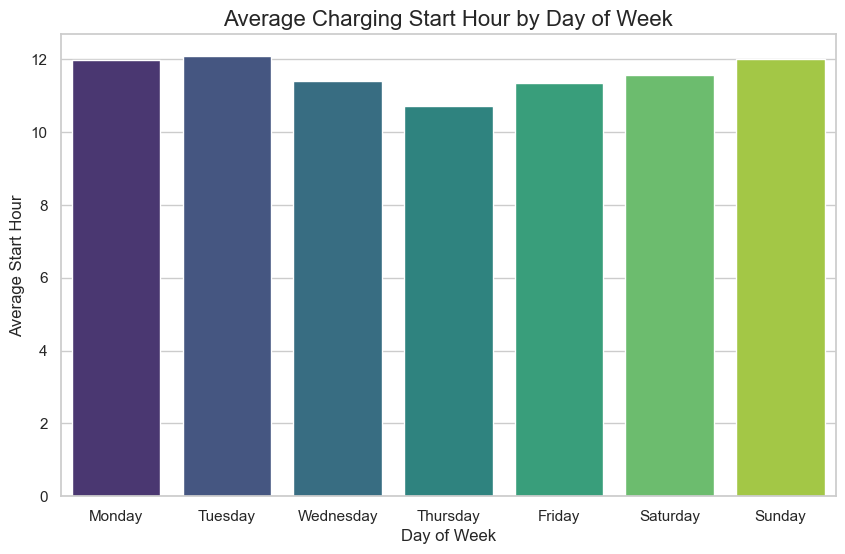

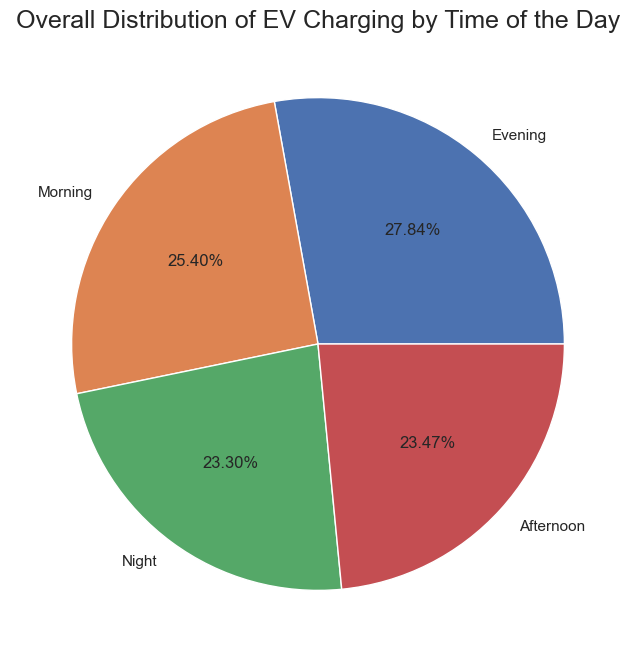

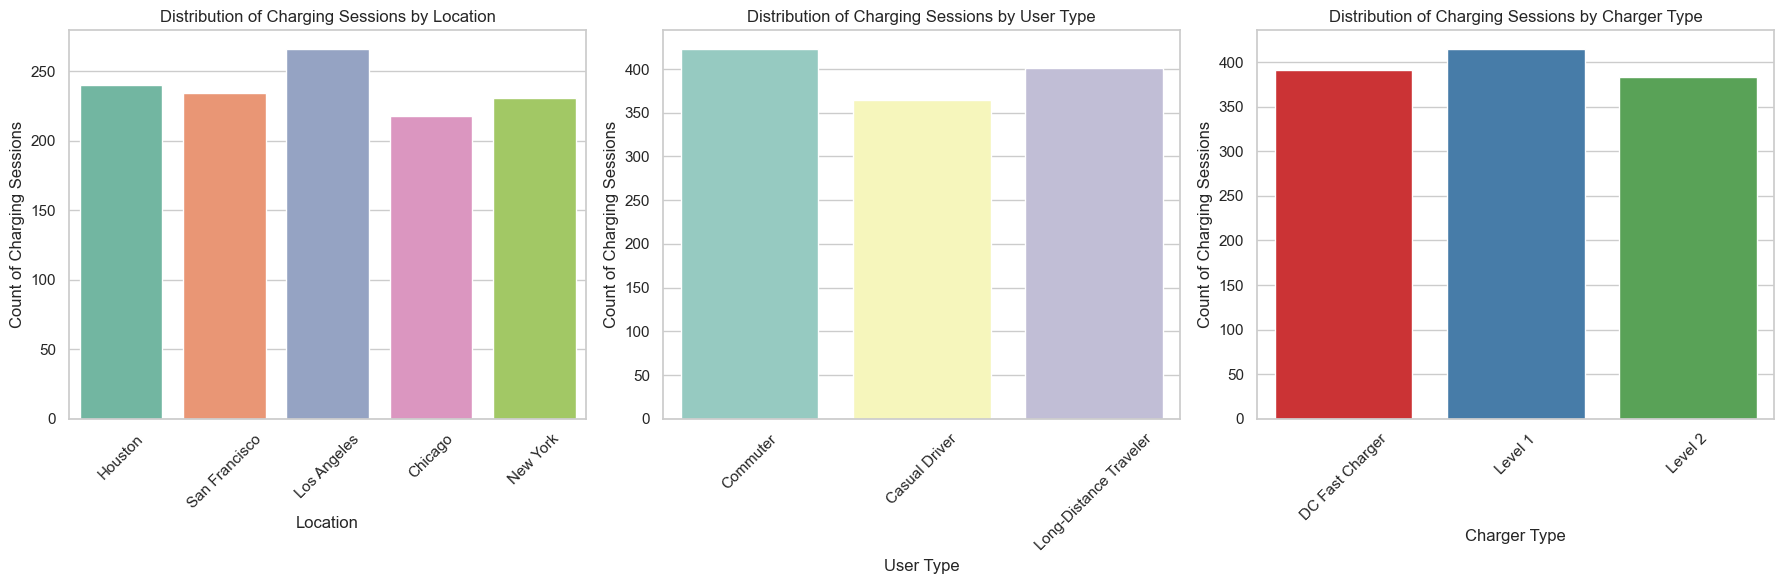

In [4]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


sns.set_theme(style="whitegrid")

#Charging start hour duration
plt.figure(figsize=(10, 6))
sns.histplot(data['Charging Start Hour'], bins=24, kde=False, palette='coolwarm')
plt.title("Charging Start Hour Distribution", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(range(0, 24))
plt.show()

# Charging Duration vs Energy Consumed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charging Duration (hours)', y='Energy Consumed (kWh)', data=data, alpha=0.7, color="purple")
plt.title("Charging Duration vs. Energy Consumed", fontsize=16)
plt.xlabel("Charging Duration (hours)", fontsize=12)
plt.ylabel("Energy Consumed (kWh)", fontsize=12)
plt.show()

# Average charging start hour by day of the week
plt.figure(figsize=(10, 6))
avg_start_hour = data.groupby("Day of Week")["Charging Start Hour"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
sns.barplot(x=avg_start_hour.index, y=avg_start_hour.values, palette="viridis", hue=avg_start_hour.index)
plt.title("Average Charging Start Hour by Day of Week", fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Average Start Hour", fontsize=12)
plt.show()

evening_counts = data[data['Time of Day']=='Evening']['Time of Day'].value_counts().values[0]
morning_counts = data[data['Time of Day']=='Morning']['Time of Day'].value_counts().values[0]
night_counts = data[data['Time of Day']=='Night']['Time of Day'].value_counts().values[0]
afternoon_counts = data[data['Time of Day']=='Afternoon']['Time of Day'].value_counts().values[0]

index_values = [evening_counts, morning_counts, night_counts, afternoon_counts]
index_labels=['Evening', 'Morning', 'Night', 'Afternoon']

plt.figure(figsize=(10,8))
plt.pie(index_values, labels =index_labels, autopct='%2.2f%%')
plt.title('Overall Distribution of EV Charging by Time of the Day', fontsize=18)

plt.show()


sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(ax=axes[0], data=data, x='Charging Station Location', palette='Set2')
axes[0].set_title('Distribution of Charging Sessions by Location')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Count of Charging Sessions')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1], data=data, x='User Type', palette='Set3')
axes[1].set_title('Distribution of Charging Sessions by User Type')
axes[1].set_xlabel('User Type')
axes[1].set_ylabel('Count of Charging Sessions')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[2], data=data, x='Charger Type', palette='Set1')
axes[2].set_title('Distribution of Charging Sessions by Charger Type')
axes[2].set_xlabel('Charger Type')
axes[2].set_ylabel('Count of Charging Sessions')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

DBSCAN

Number of clusters: 1


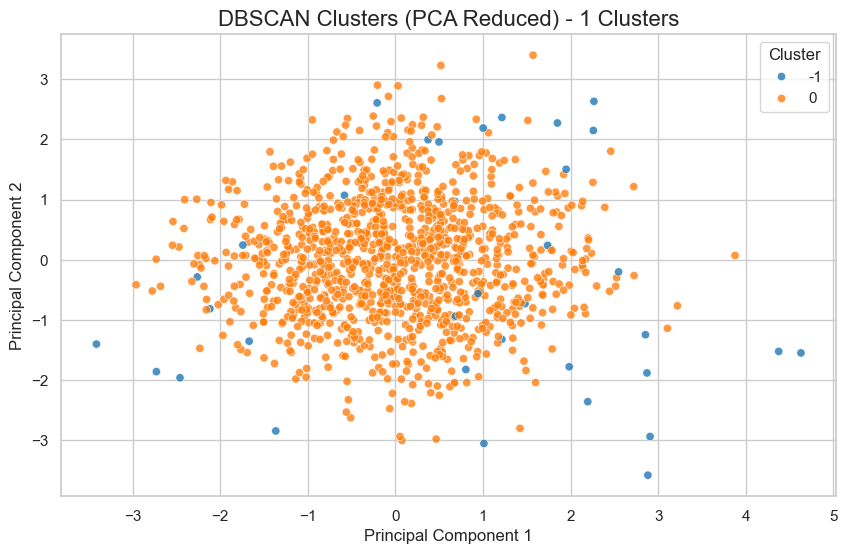

In [7]:
from sklearn.cluster import DBSCAN

# Select features for clustering
features_for_clustering = [
    "Energy Consumed (kWh)",
    "Charging Duration (hours)",
    "Charging Rate (kW)",
    "State of Charge (Start %)",
    "State of Charge (End %)",
    "Distance Driven (since last charge) (km)"]
clustering_data = data[features_for_clustering]

# Normalize the data for DBSCAN
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Tune DBSCAN parameters
dbscan = DBSCAN(eps=1.78, min_samples=10)  # Adjust these parameters
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Add cluster labels to the original data
data['Cluster'] = dbscan_clusters

# Calculate the number of unique clusters (excluding noise)
num_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print(f"Number of clusters: {num_clusters}")

# Visualize clusters in the reduced PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=dbscan_clusters, palette="tab10", alpha=0.8)
plt.title(f"DBSCAN Clusters (PCA Reduced) - {num_clusters} Clusters", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Cluster", loc="upper right")
plt.show()


GMM

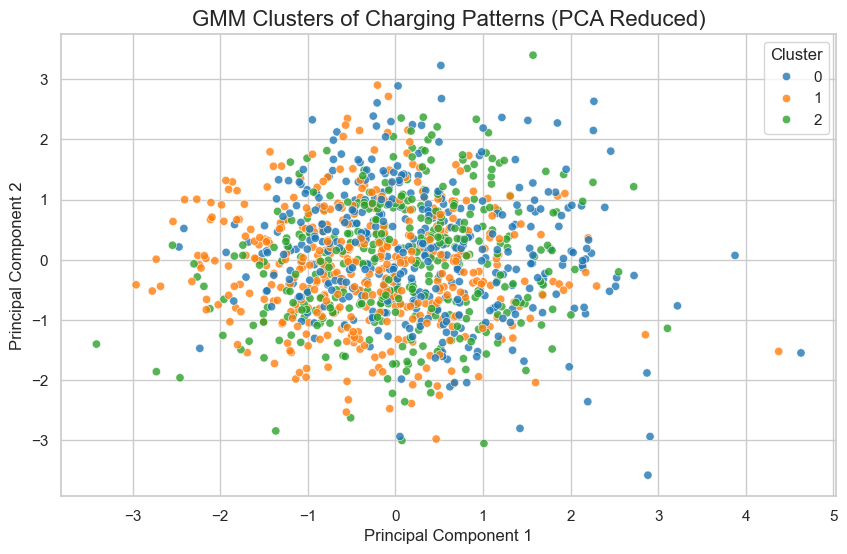

In [8]:
from sklearn.mixture import GaussianMixture

# Select features for clustering
features_for_clustering = [
    "Energy Consumed (kWh)",
    "Charging Duration (hours)",
    "Charging Rate (kW)",
    "State of Charge (Start %)",
    "State of Charge (End %)",
    "Distance Driven (since last charge) (km)"]
clustering_data = data[features_for_clustering]

# Normalize the data for GMM
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply PCA for visualization (optional for clustering)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Perform GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components as needed
gmm_clusters = gmm.fit_predict(scaled_data)

# Add cluster labels to the original data
data['Cluster'] = gmm_clusters

# Visualize clusters in the reduced PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=gmm_clusters, palette="tab10", alpha=0.8)
plt.title("GMM Clusters of Charging Patterns (PCA Reduced)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Cluster", loc="upper right")
plt.show()


Metrics validation

In [9]:
from sklearn.metrics import silhouette_score

gmm_silhouette = silhouette_score(scaled_data, gmm_clusters)

if len(set(dbscan_clusters)) > 1:
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_clusters)
else:
    dbscan_silhouette = None

print("gmm :- ",gmm_silhouette)

print("\ndbscan :-",dbscan_silhouette)

gmm :-  0.0943116869121215

dbscan :- 0.35317702190760375
